In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_url = "https://www.sgcarmart.com/used_cars/listing.php?BRSR={}&RPG=100&AVL=2"
cars_data = []
for page in range(0,401,100):
    url = base_url.format(page)
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "html.parser")
    listings_blue = soup.find_all('table',{'style':"background-color:#F6FEFF;"})
    listings_white = soup.find_all('table',{'style':"background-color:#FFFFFF;"})
   
    for car in listings_blue:
        price = car.find('div',{"style":"width:67px; font-weight:bold;"}).text.strip()[1:]
        name = car.find_all('a',href=True)[1].text.strip()
        depre = car.find('div',{'style':'width:101px;'}).text.strip()[1:-4]
        reg = car.find('div',{'style':'width:89px;'}).text.strip()
        engine = car.find('div',{'style':'width:84px;'}).text.strip()[:-3]
        mile = car.find('div',{'style':'width:83px;'}).text.strip()[:-3]
        type = car.find('a',{'class':'link_black nounderline'}).text
        try:
            description = car.find('div',{'class':'two_line_text'}).text
        except:
            description = "NA"
        try:
            seller = car.find('a',{'style':'color:#950000;'}).text
        except:
            seller = 'NA'
        
        row = {
            'name':name,
            'price':price,
            'depreciation':depre,
            'registration date':reg,
            'engine capacity':engine,
            'mileage':mile,
            'vehicle type':type,
            'description':description,
            'seller':seller
        }
        
        cars_data.append(row)
        
    for car in listings_white:
        price = car.find('div',{"style":"width:67px; font-weight:bold;"}).text.strip()[1:]
        name = car.find_all('a',href=True)[1].text.strip()
        depre = car.find('div',{'style':'width:101px;'}).text.strip()[1:-4]
        reg = car.find('div',{'style':'width:89px;'}).text.strip()
        engine = car.find('div',{'style':'width:84px;'}).text.strip()[:-3]
        mile = car.find('div',{'style':'width:83px;'}).text.strip()[:-3]
        type = car.find('a',{'class':'link_black nounderline'}).text
        try:
            description = car.find('div',{'class':'two_line_text'}).text
        except:
            description = "NA"
        try:
            seller = car.find('a',{'style':'color:#950000;'}).text
        except:
            seller = 'NA'
        
        row = {
            'name':name,
            'price':price,
            'depreciation':depre,
            'registration date':reg,
            'engine capacity':engine,
            'mileage':mile,
            'vehicle type':type,
            'description':description,
            'seller':seller
        }
        
        cars_data.append(row)

In [ ]:
cars = pd.DataFrame(cars_data)

In [ ]:
cars.head()

,name,price,depreciation,registration date,engine capacity,mileage,vehicle type,description,seller
0,Lexus UX200 Luxury,"169,800","17,710",23-Dec-2020,"1,987","30,000",SUV,1 owner unit! Full servicing under Borneo Moto...,San Hup Bee (S) Pte Ltd
1,Mazda 3 Mild Hybrid 1.5A Classic,"108,000","12,140",04-May-2021,"1,496","12,800",Sedan,"2nd owner, 1st owner was my dad. Like new, fue...",NA
2,BMW 1 Series 116i M-Sport (COE till 08/2032),"103,800","10,390",19-Oct-2012,"1,598","68,000",Hatchback,M-Sport bodykit with Estoril blue metallic pai...,San Hup Bee (S) Pte Ltd
3,Toyota Corolla Axio 1.5A X (COE till 05/2028),"53,800","9,440",20-May-2008,"1,496","79,000",Sedan,Low mileage! 2 transferred count due to intern...,San Hup Bee (S) Pte Ltd
4,BMW 5 Series 520i,"91,800","19,950",25-Feb-2016,"1,997","82,063",Luxury,Low mileage PML unit with original paintwork. ...,D Car Trader Pte Ltd


In [ ]:
cars.price = pd.to_numeric(cars.price.str.replace(',',''))

In [ ]:
cols = ['depreciation','engine capacity','mileage']
for col in cols:
    cars[col] = pd.to_numeric(cars[col].str.replace(',',''))

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               499 non-null    object 
 1   price              497 non-null    float64
 2   depreciation       490 non-null    float64
 3   registration date  499 non-null    object 
 4   engine capacity    496 non-null    float64
 5   mileage            394 non-null    float64
 6   vehicle type       499 non-null    object 
 7   description        499 non-null    object 
 8   seller             499 non-null    object 
dtypes: float64(4), object(5)
memory usage: 35.2+ KB


In [ ]:
cars['brand'] = cars['name'].apply(lambda x:x.split()[0])

In [ ]:
cars['brand'] = cars['brand'].str.replace('Land','Land Rover')

In [ ]:
cars.replace('NA',np.nan,inplace=True)

In [ ]:
cars

,name,price,depreciation,registration date,engine capacity,mileage,vehicle type,description,seller,brand
0,Lexus UX200 Luxury,169800.0,17710.0,23-Dec-2020,1987.0,30000.0,SUV,1 owner unit! Full servicing under Borneo Moto...,San Hup Bee (S) Pte Ltd,Lexus
1,Mazda 3 Mild Hybrid 1.5A Classic,108000.0,12140.0,04-May-2021,1496.0,12800.0,Sedan,"2nd owner, 1st owner was my dad. Like new, fue...",NaN,Mazda
2,BMW 1 Series 116i M-Sport (COE till 08/2032),103800.0,10390.0,19-Oct-2012,1598.0,68000.0,Hatchback,M-Sport bodykit with Estoril blue metallic pai...,San Hup Bee (S) Pte Ltd,BMW
3,Toyota Corolla Axio 1.5A X (COE till 05/2028),53800.0,9440.0,20-May-2008,1496.0,79000.0,Sedan,Low mileage! 2 transferred count due to intern...,San Hup Bee (S) Pte Ltd,Toyota
4,BMW 5 Series 520i,91800.0,19950.0,25-Feb-2016,1997.0,82063.0,Luxury,Low mileage PML unit with original paintwork. ...,D Car Trader Pte Ltd,BMW
...,...,...,...,...,...,...,...,...,...,...
494,Toyota Wish 1.8A (COE till 05/2029),68800.0,10220.0,30-Jul-2009,1797.0,138238.0,MPV,$972 monthly! 100% in house loan by gv cars fi...,GV Automobile Centre Pte Ltd,Toyota
495,Mercedes-Benz E-Class E200 Avantgarde,179800.0,21180.0,19-Jun-2019,1991.0,51000.0,Luxury,Free extended warranty available from C&C. Ful...,Pure Motors Pte Ltd,Mercedes-Benz
496,Mitsubishi Attrage 1.2A Sports,78800.0,10400.0,07-Jan-2020,1193.0,34000.0,Sedan,1 owner only! Agent maintained! Extremely low ...,Benefit Auto Enterprise Pte Ltd,Mitsubishi
497,Mercedes-Benz A-Class A180,56800.0,18460.0,19-May-2015,1595.0,101000.0,Hatchback,Agent servicing! 100% in house loan and bank l...,Benefit Auto Enterprise Pte Ltd,Mercedes-Benz


In [ ]:
cars['registration date'] = pd.to_datetime(cars['registration date'],errors='coerce')

In [ ]:
cars['year'] = cars['registration date'].apply(lambda x:x.year)

In [ ]:
cols = ['depreciation','engine capacity','mileage','year']
for col in cols:
    cars[col] = cars[col].astype('Int64')

In [ ]:
cars

,name,price,depreciation,registration date,engine capacity,mileage,vehicle type,description,seller,brand,year
0,Lexus UX200 Luxury,169800.0,17710,2020-12-23,1987,30000,SUV,1 owner unit! Full servicing under Borneo Moto...,San Hup Bee (S) Pte Ltd,Lexus,2020
1,Mazda 3 Mild Hybrid 1.5A Classic,108000.0,12140,2021-05-04,1496,12800,Sedan,"2nd owner, 1st owner was my dad. Like new, fue...",NaN,Mazda,2021
2,BMW 1 Series 116i M-Sport (COE till 08/2032),103800.0,10390,2012-10-19,1598,68000,Hatchback,M-Sport bodykit with Estoril blue metallic pai...,San Hup Bee (S) Pte Ltd,BMW,2012
3,Toyota Corolla Axio 1.5A X (COE till 05/2028),53800.0,9440,2008-05-20,1496,79000,Sedan,Low mileage! 2 transferred count due to intern...,San Hup Bee (S) Pte Ltd,Toyota,2008
4,BMW 5 Series 520i,91800.0,19950,2016-02-25,1997,82063,Luxury,Low mileage PML unit with original paintwork. ...,D Car Trader Pte Ltd,BMW,2016
...,...,...,...,...,...,...,...,...,...,...,...
494,Toyota Wish 1.8A (COE till 05/2029),68800.0,10220,2009-07-30,1797,138238,MPV,$972 monthly! 100% in house loan by gv cars fi...,GV Automobile Centre Pte Ltd,Toyota,2009
495,Mercedes-Benz E-Class E200 Avantgarde,179800.0,21180,2019-06-19,1991,51000,Luxury,Free extended warranty available from C&C. Ful...,Pure Motors Pte Ltd,Mercedes-Benz,2019
496,Mitsubishi Attrage 1.2A Sports,78800.0,10400,2020-01-07,1193,34000,Sedan,1 owner only! Agent maintained! Extremely low ...,Benefit Auto Enterprise Pte Ltd,Mitsubishi,2020
497,Mercedes-Benz A-Class A180,56800.0,18460,2015-05-19,1595,101000,Hatchback,Agent servicing! 100% in house loan and bank l...,Benefit Auto Enterprise Pte Ltd,Mercedes-Benz,2015


In [ ]:
cars = cars[['name','brand','price','registration date','year',
             'depreciation','engine capacity','mileage','vehicle type','description','seller']]

In [ ]:
cars

,name,brand,price,registration date,year,depreciation,engine capacity,mileage,vehicle type,description,seller
0,Lexus UX200 Luxury,Lexus,169800.0,2020-12-23,2020,17710,1987,30000,SUV,1 owner unit! Full servicing under Borneo Moto...,San Hup Bee (S) Pte Ltd
1,Mazda 3 Mild Hybrid 1.5A Classic,Mazda,108000.0,2021-05-04,2021,12140,1496,12800,Sedan,"2nd owner, 1st owner was my dad. Like new, fue...",NaN
2,BMW 1 Series 116i M-Sport (COE till 08/2032),BMW,103800.0,2012-10-19,2012,10390,1598,68000,Hatchback,M-Sport bodykit with Estoril blue metallic pai...,San Hup Bee (S) Pte Ltd
3,Toyota Corolla Axio 1.5A X (COE till 05/2028),Toyota,53800.0,2008-05-20,2008,9440,1496,79000,Sedan,Low mileage! 2 transferred count due to intern...,San Hup Bee (S) Pte Ltd
4,BMW 5 Series 520i,BMW,91800.0,2016-02-25,2016,19950,1997,82063,Luxury,Low mileage PML unit with original paintwork. ...,D Car Trader Pte Ltd
...,...,...,...,...,...,...,...,...,...,...,...
494,Toyota Wish 1.8A (COE till 05/2029),Toyota,68800.0,2009-07-30,2009,10220,1797,138238,MPV,$972 monthly! 100% in house loan by gv cars fi...,GV Automobile Centre Pte Ltd
495,Mercedes-Benz E-Class E200 Avantgarde,Mercedes-Benz,179800.0,2019-06-19,2019,21180,1991,51000,Luxury,Free extended warranty available from C&C. Ful...,Pure Motors Pte Ltd
496,Mitsubishi Attrage 1.2A Sports,Mitsubishi,78800.0,2020-01-07,2020,10400,1193,34000,Sedan,1 owner only! Agent maintained! Extremely low ...,Benefit Auto Enterprise Pte Ltd
497,Mercedes-Benz A-Class A180,Mercedes-Benz,56800.0,2015-05-19,2015,18460,1595,101000,Hatchback,Agent servicing! 100% in house loan and bank l...,Benefit Auto Enterprise Pte Ltd


In [ ]:
cars.to_csv('used_cars_bact.csv',index=False)

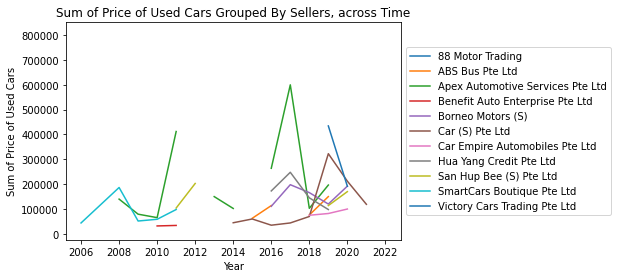

In [ ]:
year_sorted = cars.groupby(['year', 'seller'])['price'].sum().to_frame()
year_sorted = year_sorted.groupby("seller").filter(lambda x: len(x) >= 5)
year_sorted.pivot_table(values="price", index="year", columns="seller").plot()

# year_sorted.set_index('seller', inplace=True)
# year_sorted = cars.groupby(['year', 'seller'])['price'].sum().to_frame()

#Creating the line chart
# plt.plot(year_sorted['year'], year_sorted['price']) 

# Title, Label
plt.title("Sum of Price of Used Cars Grouped By Sellers, across Time")
plt.xlabel('Year')
plt.ylabel('Sum of Price of Used Cars')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Show the plot
plt.show()

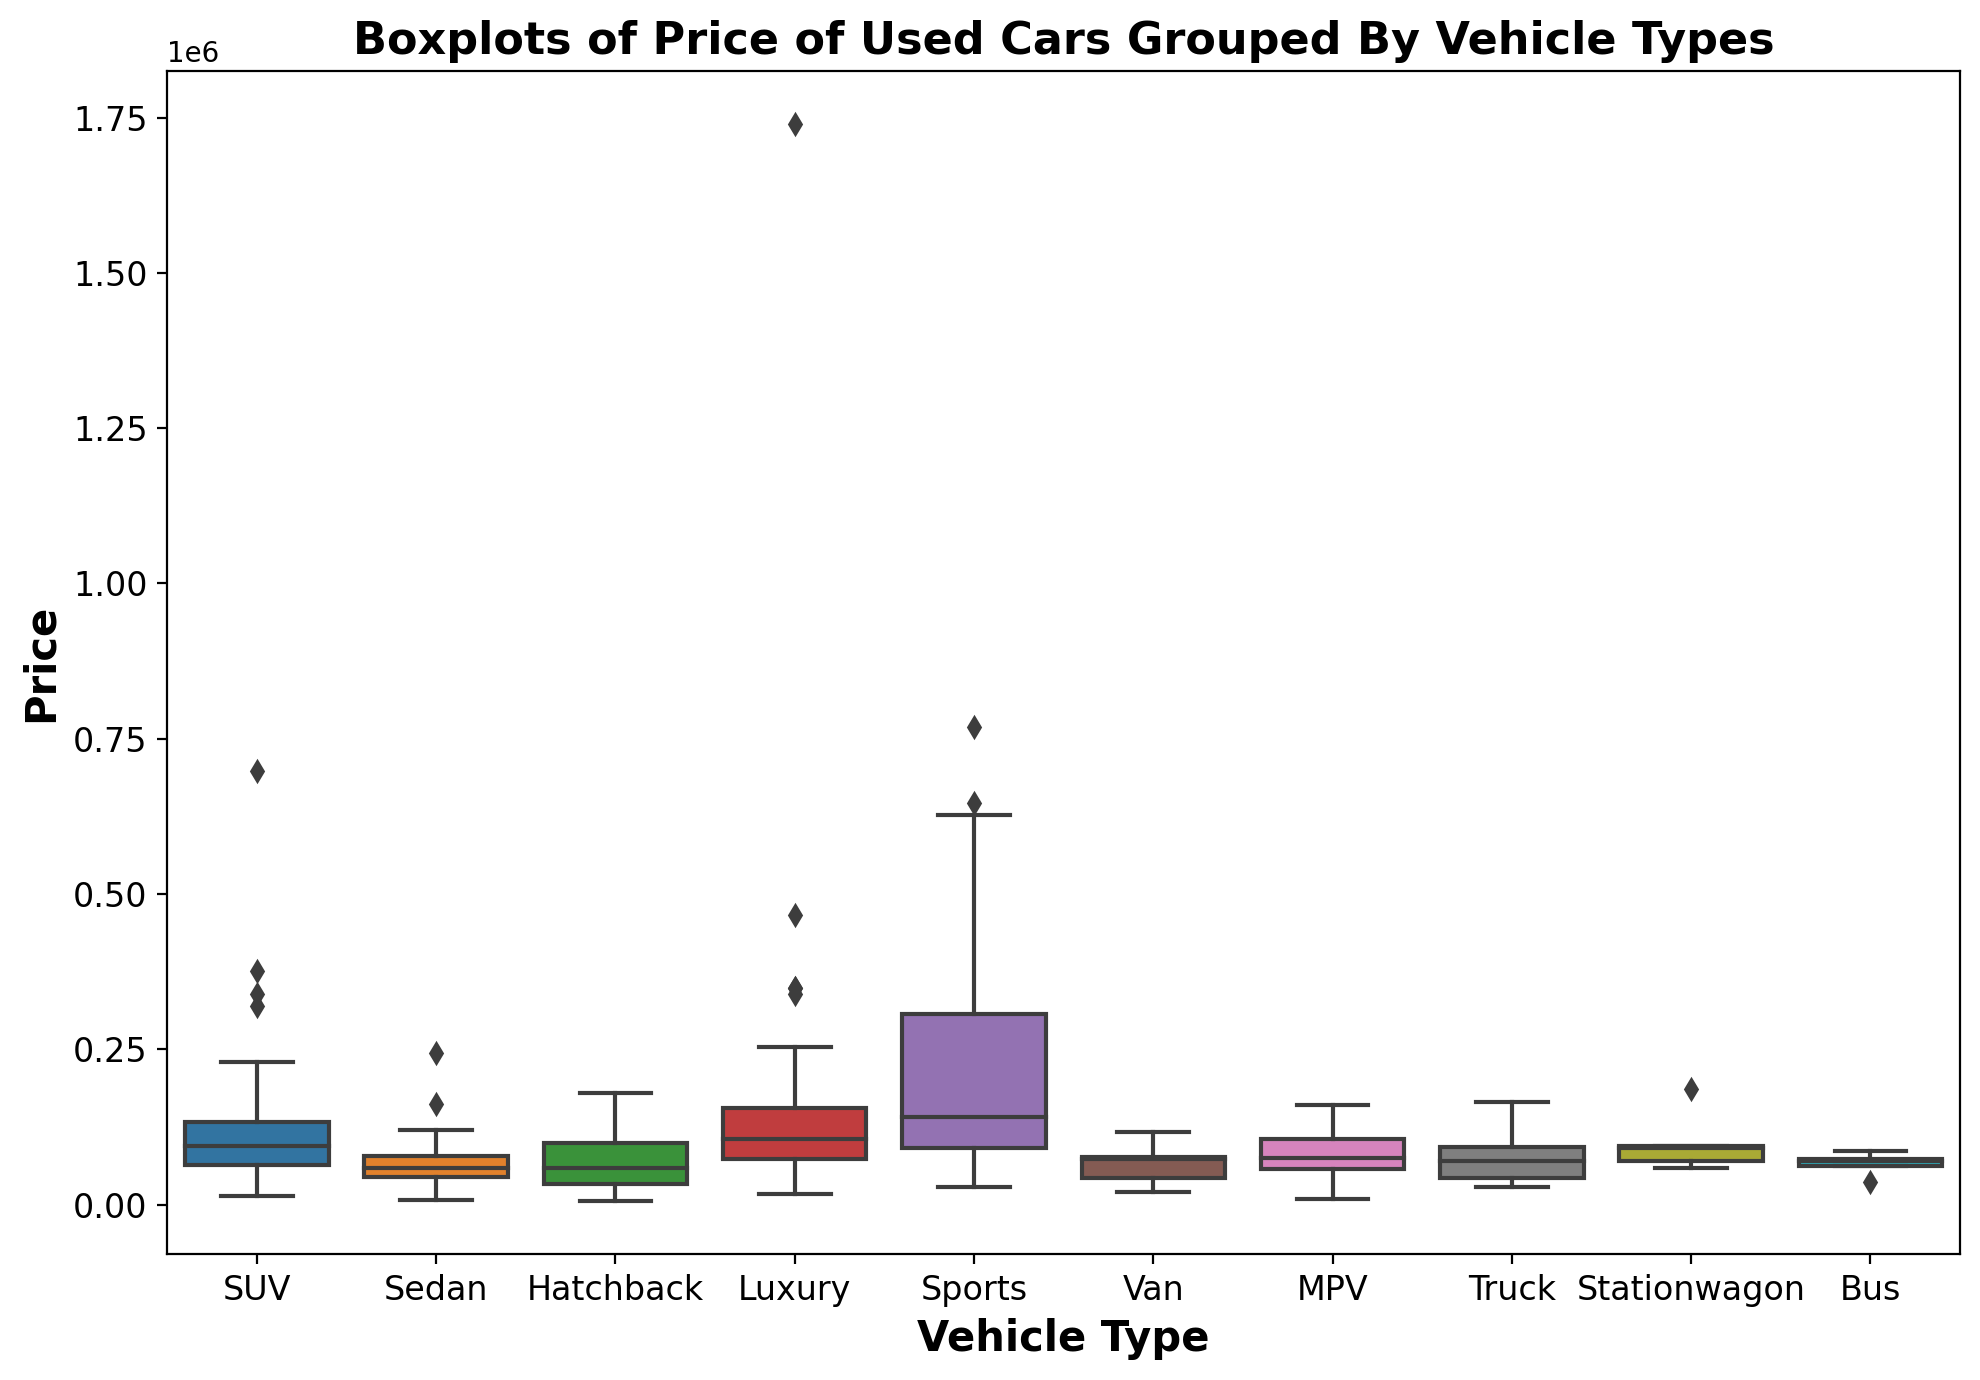

In [ ]:
fig,ax = plt.subplots(figsize=(10,7),dpi=200)
sns.boxplot(data=cars, x='vehicle type', y='price')
ax.set_xlabel(r"Vehicle Type", fontsize=15, fontweight='bold')
ax.set_ylabel(r"Price", fontsize=15, fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Boxplots of Price of Used Cars Grouped By Vehicle Types',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

AttributeError: ignored

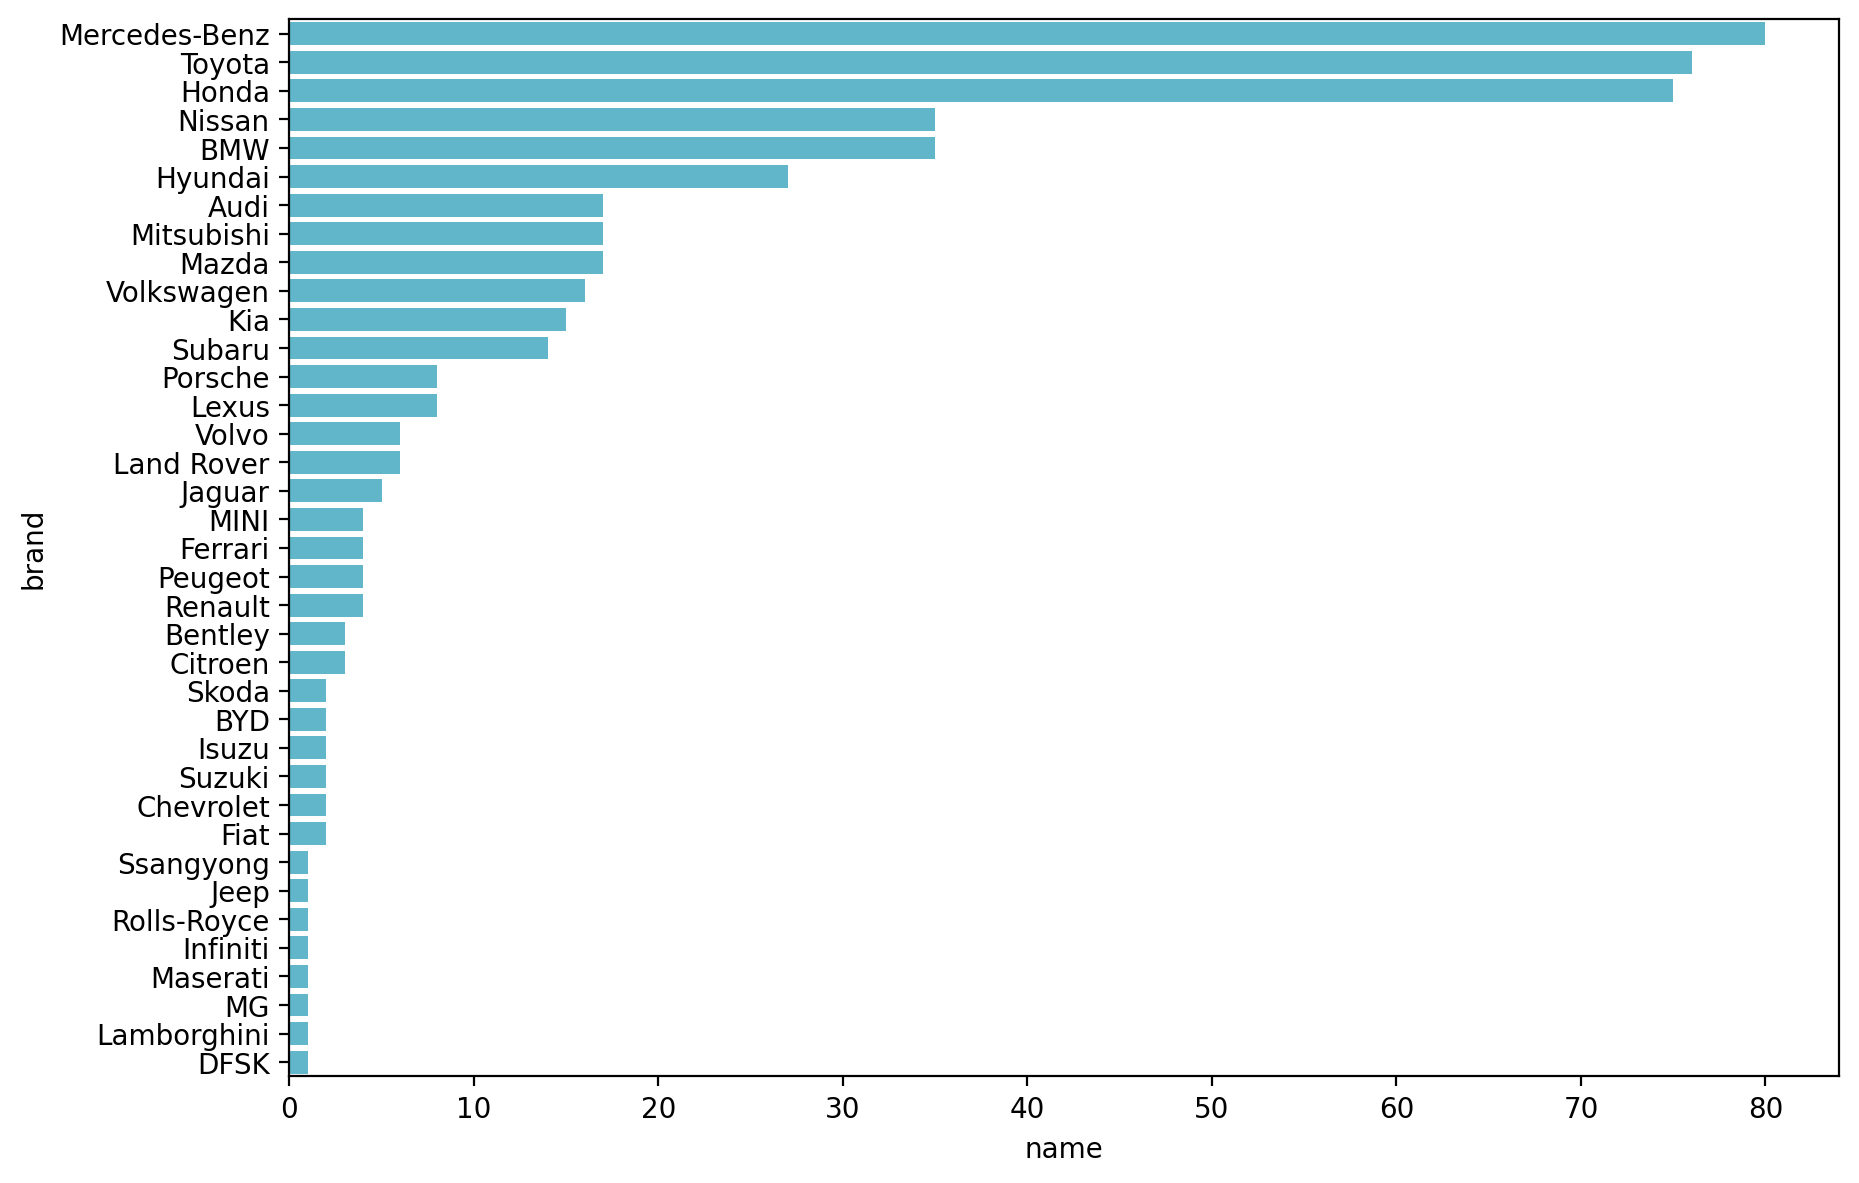

In [ ]:
brand_sorted = cars.groupby('brand',as_index=False).count().sort_values('name',ascending=False)

fig,ax = plt.subplots(figsize=(10,7),dpi=200)
sns.barplot(data=brand_sorted,x='name',y='brand',color='#50C2DA',orient='h')
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlabel(r"Number of Cars",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Brand",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Number of Used Cars by Brand',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

In [ ]:
type_sorted = cars.groupby('vehicle type',as_index=False).count().sort_values('name',ascending=False)

fig,ax = plt.subplots(figsize=(10,6),dpi=200)
sns.barplot(data=type_sorted,x='vehicle type',y='name',color='#50C2DA')
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlabel(r"Brand",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Number of Cars",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Number of Used Cars by Vehicle Type',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

In [ ]:
fig,ax = plt.subplots(figsize=(8,4),dpi=200)
sns.histplot(data=cars,x='mileage',color='#50C2DA',bins=100,kde=True)
ax.set_xlabel(r"Mileage (in km)",fontsize=12,fontweight='bold')
ax.set_ylabel(r"Numbers of Cars",fontsize=12,fontweight='bold')
plt.title('Number of Used Cars by Mileage',
          fontweight='bold',fontsize=13,loc='center')
plt.tight_layout()



---



Code for boxplots of prices for each seller with at least 5 car listings (Natania)

In [ ]:
cars_seller_filtered = cars.groupby("seller").filter(lambda x: len(x) >= 5)
cars_seller_filtered.seller.value_counts()

Apex Automotive Services Pte Ltd    26
ABS Bus Pte Ltd                     16
Car (S) Pte Ltd                     14
Victory Cars Trading Pte Ltd        10
Car Empire Automobiles Pte Ltd       9
SmartCars Boutique Pte Ltd           9
SG Motor Link Pte Ltd                9
Lek Auto Pte Ltd                     8
San Hup Bee (S) Pte Ltd              7
Hua Yang Credit Pte Ltd              7
Benefit Auto Enterprise Pte Ltd      7
Borneo Motors (S)                    6
Carz World Pte Ltd                   6
88 Motor Trading                     6
D Car Trader Pte Ltd                 5
1axis                                5
Reliance Autohub Pte Ltd             5
Euro Performance Asia Pte Ltd        5
Cosmo Automobiles                    5
Name: seller, dtype: int64

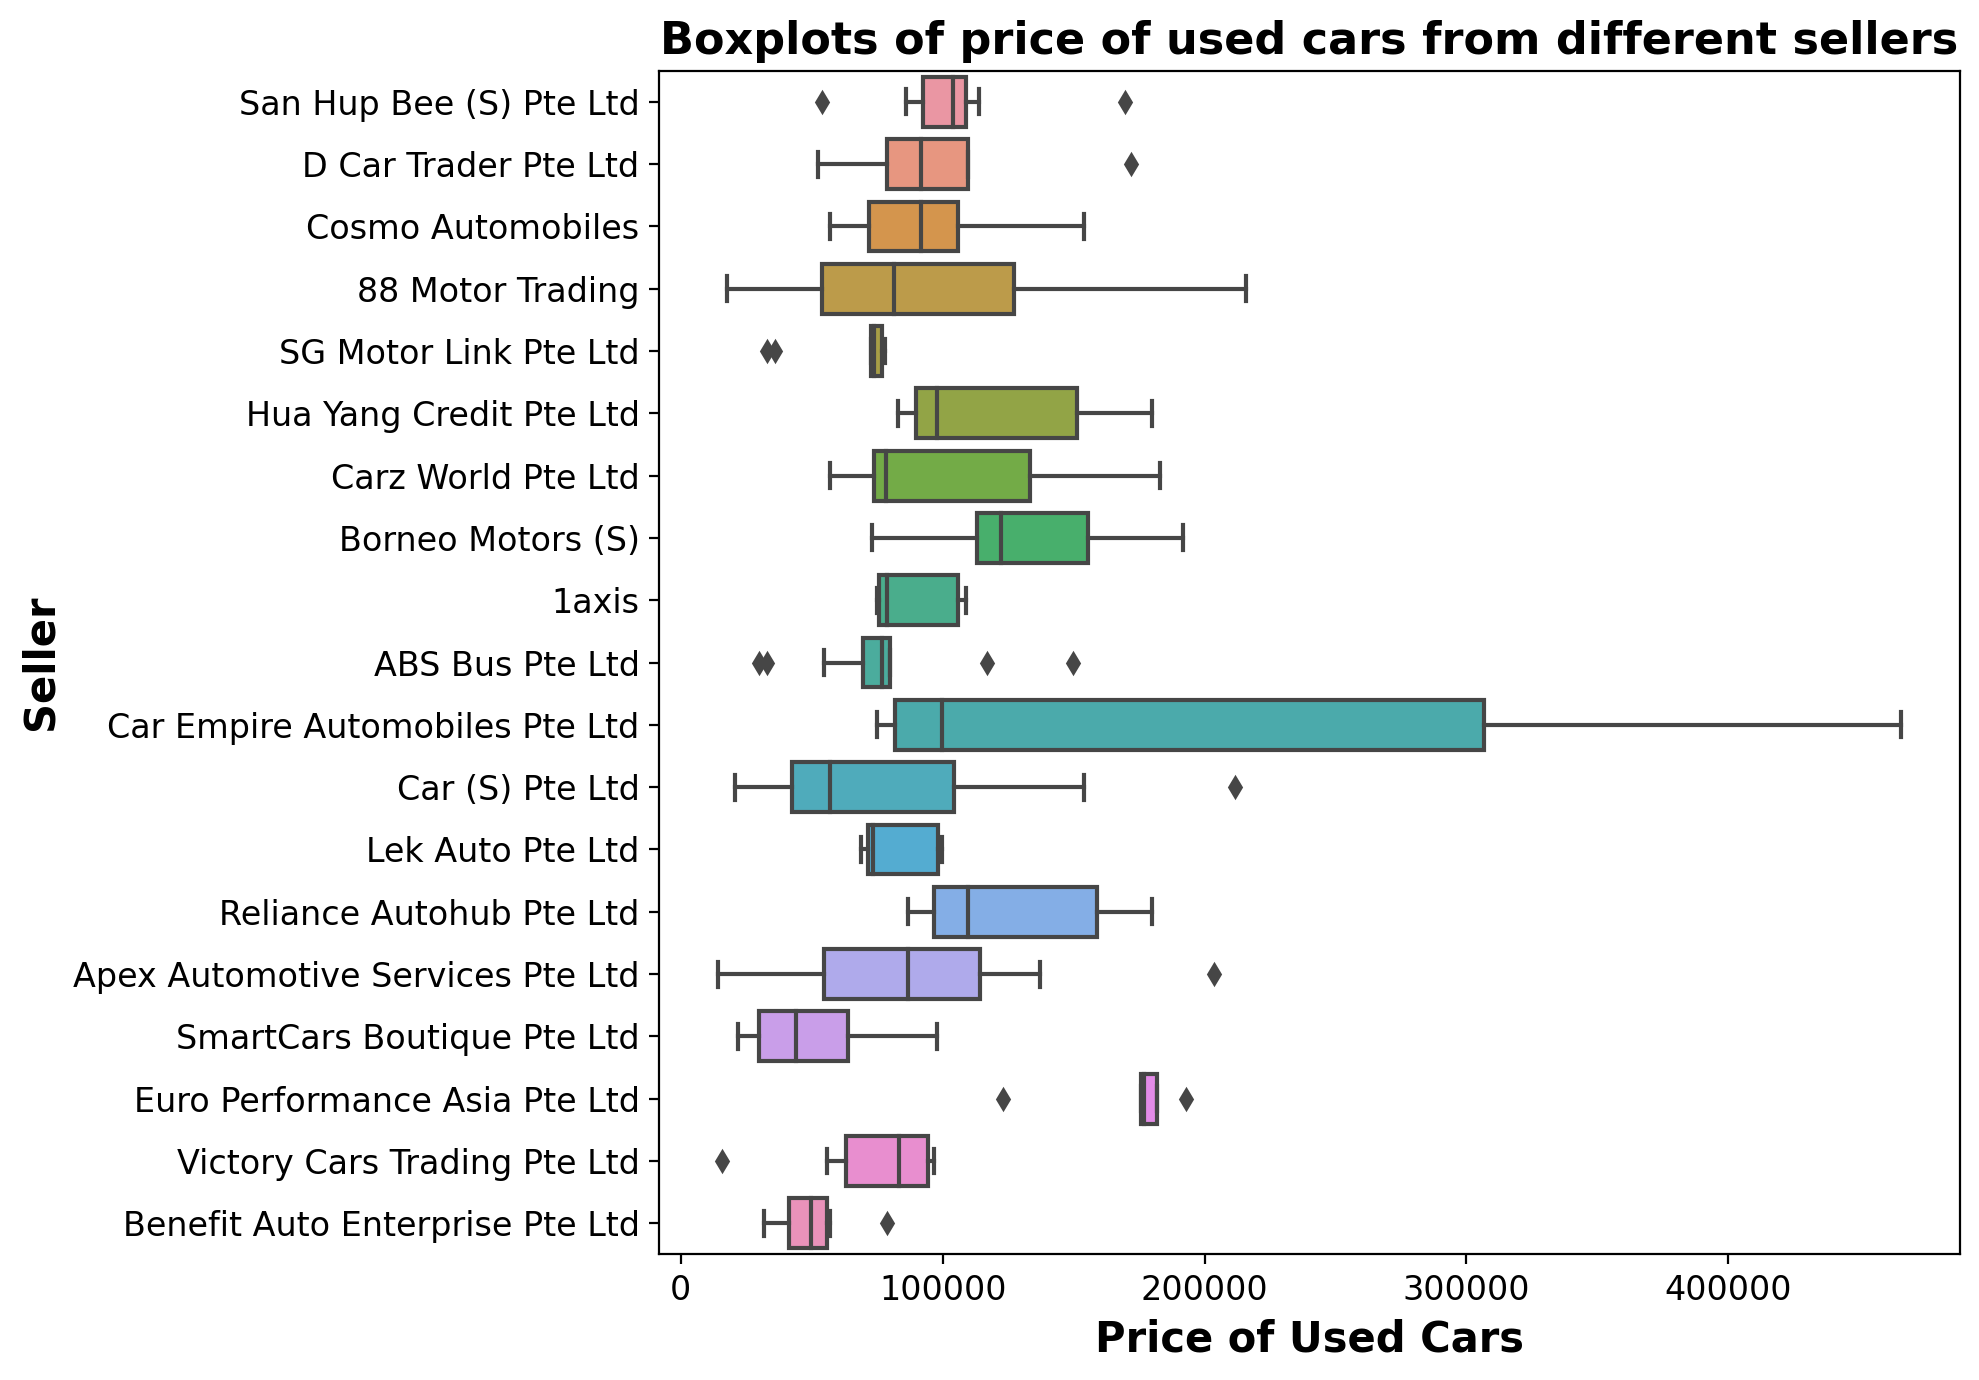

In [ ]:
fig,ax = plt.subplots(figsize=(10,7),dpi=200)
sns.boxplot(data=cars_seller_filtered, x='price', y='seller')
ax.set_xlabel(r"Price of Used Cars", fontsize=15, fontweight='bold')
ax.set_ylabel(r"Seller", fontsize=15, fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Boxplots of price of used cars from different sellers',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

Code for Wordcloud of Descriptions (Natania)

In [ ]:
from wordcloud import WordCloud

text = " ".join(desc for desc in cars.description.astype(str))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, background_color="white",max_words=len(text)).generate(text)
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



---



Highest Depreciation Car Brands (Tristen)


In [ ]:
df= cars[["brand", "depreciation"]].groupby("brand", as_index=False).mean().sort_values('depreciation',ascending=True)
name = df["brand"].head(12)
price = df['depreciation'].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cars and their Avg Depreciation',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'BACT', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [ ]:
brand_sorted = cars.groupby('brand',as_index=False).count().sort_values('depreciation',ascending=True).head(20)

fig,ax = plt.subplots(figsize=(10,7),dpi=200)
plot = sns.barplot(data=brand_sorted,x='name',y='brand',color='brown',orient='h')
ax.tick_params(axis='both',labelsize=12)
plt.title('Number of Used Cars by Brand',fontweight='bold',fontsize=16,loc='center')
plot.set_xlabel("Count")
plot.set_ylabel("Car Brand")
plt.tight_layout()

In [ ]:
year_sorted

In [ ]:
year_sorted = cars
cars.set_index('year', inplace=True)
year_sorted = cars.groupby('seller')['price'].sum().to_frame().plot()

#Creating the line chart
# plt.plot(year_sorted['year'], year_sorted['price']) 

# Title, Label
plt.title('Sepal width across Sepal lengths')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#Show the plot
plt.show()

In [ ]:
for col in cars.columns:
  print(col)

In [ ]:
brand_sorted